In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
mnist = pd.read_csv('mnist_train.csv')

In [51]:
mnist.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [52]:
labels = mnist['label'].values
pixels = mnist.drop(columns=['label']).values

In [53]:
images = pixels.reshape(-1, 28, 28)

In [60]:
labels = np.array(labels)
images = images / 255.0
images = images.reshape(images.shape[0],-1)

In [61]:
def pca(X: np.array, k: int) -> np.array:
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    basis = eigenvectors[:, :k]
    return basis    

In [62]:
def projection(X: np.array, basis: np.array):
    projections = np.dot(X, basis)
    return projections

In [63]:
def inverse_transform(projections: np.array, basis: np.array, mean_X: np.array, original_shape: tuple):
    X_reconstructed_flat = np.dot(projections, basis.T) + mean_X
    X_reconstructed = X_reconstructed_flat.reshape((-1,) + original_shape)
    return X_reconstructed

In [70]:
basis = pca(images,30)
projections = projection(images,basis)

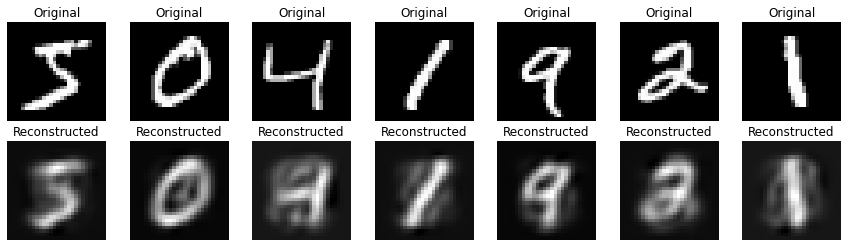

In [71]:
mean_X = np.mean(images, axis=0)
reconstructed_images = inverse_transform(projections, basis, mean_X, (28,28,1))

n_images = 7

fig, axes = plt.subplots(2, n_images, figsize=(15, 4))

for i in range(n_images):
    # Original image
    ax = axes[0, i]
    ax.imshow(images[i].reshape(28,28,1), cmap='gray')
    ax.axis('off')
    ax.set_title('Original')

    # Reconstructed image
    ax = axes[1, i]
    ax.imshow(reconstructed_images[i].reshape(28,28,1), cmap='gray')
    ax.axis('off')
    ax.set_title('Reconstructed')

plt.show()
